In [27]:
#import all relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
import branca.colormap as cm
import datetime
%matplotlib inline

In [36]:
#read in csv file into dataframe
df_raw = pd.read_csv('./analyze_me.csv')
df_raw.head() #view first few rows

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [37]:
count_missing_values = len(df_raw) - df_raw.count()
print('Missing values for each column:')
print(count_missing_values)

Missing values for each column:
delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64


In [38]:
# filter data for only unique deliveries
df = df_raw.drop_duplicates()
print(len(df_raw), ' records')
print(len(df), ' records after removing duplicates')

5983  records
5967  records after removing duplicates


In [39]:
df.dtypes

delivery_id                              int64
customer_id                              int64
jumpman_id                               int64
vehicle_type                            object
pickup_place                            object
place_category                          object
item_name                               object
item_quantity                          float64
item_category_name                      object
how_long_it_took_to_order               object
pickup_lat                             float64
pickup_lon                             float64
dropoff_lat                            float64
dropoff_lon                            float64
when_the_delivery_started               object
when_the_Jumpman_arrived_at_pickup      object
when_the_Jumpman_left_pickup            object
when_the_Jumpman_arrived_at_dropoff     object
dtype: object

In [104]:
# drop raw dataframe
del df_raw

# apply date format to columns
df.loc[:,14:] = df.iloc[:,14:].apply(pd.to_datetime, errors='coerce')
df.iloc[:, 9] = df.iloc[:, 9].apply(pd.to_datetime, format="%H:%M:%S.%f")
print(df.dtypes)

delivery_id                                     int64
customer_id                                     int64
jumpman_id                                      int64
vehicle_type                                   object
pickup_place                                   object
place_category                                 object
item_name                                      object
item_quantity                                 float64
item_category_name                             object
how_long_it_took_to_order              datetime64[ns]
pickup_lat                                    float64
pickup_lon                                    float64
dropoff_lat                                   float64
dropoff_lon                                   float64
when_the_delivery_started              datetime64[ns]
when_the_Jumpman_arrived_at_pickup     datetime64[ns]
when_the_Jumpman_left_pickup           datetime64[ns]
when_the_Jumpman_arrived_at_dropoff    datetime64[ns]
delivery_hr                 

In [57]:
# Count of unique deliveries
number_customers = df['customer_id'].unique()
number_jumpmen = df['jumpman_id'].unique()
number_deliveries = df['delivery_id'].unique()
number_partners = df['pickup_place'].unique()
print('In the month of October,', len(number_jumpmen), ' jumpmen made ', len(number_deliveries), '  deliveries from ', 
      len(number_partners), ' places to ', len(number_customers), ' customers.') 

In the month of October, 578  jumpmen made  5214   deliveries from  898  places to  3192  customers.


In [58]:
# View customers, jumpmen and places by # of deliveries
def partner_by_delivery(column = 'column_header'):
    return df.groupby(column).size().sort_values(ascending=False).reset_index(name='count_deliveries')

#find the sum total of top n deliveries
def sum_top_n(top_n, df):
    return df.iloc[:top_n , 1].sum(axis=0)
   
jumpmen_deliveries = partner_by_delivery('jumpman_id')
customer_deliveries = partner_by_delivery('customer_id')
place_deliveries = partner_by_delivery('pickup_place')

top_n = 10
print('Top ', top_n, ' jumpmen completed ', 
      '{:2.2%}'.format(sum_top_n(top_n, jumpmen_deliveries)/ len(number_deliveries)), ' deliveries', 
      '\n', jumpmen_deliveries.head(top_n))
print('Top ', top_n, ' cutsomers made ', 
      '{:2.2%}'.format(sum_top_n(top_n, customer_deliveries)/ len(number_deliveries)), ' deliveries', 
      '\n',customer_deliveries.head(top_n))
print('Top ', top_n, ' places completed ', 
      '{:2.2%}'.format(sum_top_n(top_n, place_deliveries)/ len(number_deliveries)), ' deliveries', 
      '\n',place_deliveries.head(top_n))

Top  10  jumpmen completed  12.10%  deliveries 
    jumpman_id  count_deliveries
0       99219                78
1      104533                76
2      142394                73
3       66416                62
4       61900                61
5       30743                58
6        3296                57
7       20962                56
8       32580                56
9       23359                54
Top  10  cutsomers made  3.22%  deliveries 
    customer_id  count_deliveries
0       369272                28
1        52832                23
2       275689                17
3       125123                16
4        91817                16
5        58898                16
6       100889                14
7       250494                13
8       115610                13
9       276192                12
Top  10  places completed  28.98%  deliveries 
                 pickup_place  count_deliveries
0                Shake Shack               310
1          Momofuku Milk Bar               186
2 

Text(0, 0.5, '# of deliveries')

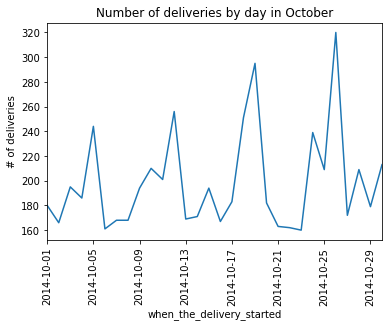

In [62]:
# of deliveries over time
df_daily = df.delivery_id.groupby(by=df['when_the_delivery_started'].dt.date).count()
df_daily.plot(x='when_the_delivery_started', y = 'delivery_id')
plt.title('Number of deliveries by day in October')
plt.xticks(rotation=90)
plt.ylabel('# of deliveries')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2657: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


Text(0.5, 0, 'Week of the year')

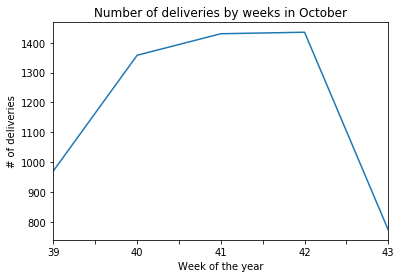

In [148]:
# of deliveries over time (week)
df_weekly = df.delivery_id.groupby(by=df['when_the_delivery_started'].dt.strftime('%W')).count()
df_weekly.plot(x='when_the_delivery_started', y = 'delivery_id')
plt.title('Number of deliveries by weeks in October')
plt.ylabel('# of deliveries')
plt.xlabel('Week of the year')

Text(0, 0.5, '# of deliveries')

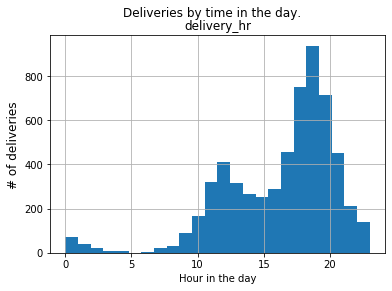

In [59]:
#group deliveries by the hour the delivery started. 
df['delivery_hr'] = df['when_the_delivery_started'].apply(lambda x: x.hour)
df.set_index('delivery_hr', drop=False, inplace=True)

df.hist(column='delivery_hr', bins=24)
plt.suptitle('Deliveries by time in the day.')
plt.xlabel('Hour in the day', fontsize=10)
plt.ylabel('# of deliveries', fontsize=12)

In [60]:
def createPlot(default=[40.74460714, -73.99074197],  zm=12):
    mymap = folium.Map(location=default, control_scale=True, zoom_start=zm)
    return mymap
# mymap = createPlot()
# mymap

In [146]:
# legend for heatmap
gradient_map = {0.2: 'rgb(0,0,255)', 0.4: 'rgb(0,255,255)', 0.6: 'lime', 0.8: 'rgb(255,255,0)', 1: 'rgb(255,0,0)'}

nyheatmap = createPlot()

plugins.HeatMap(data=df[['dropoff_lat', 'dropoff_lon', 'delivery_id']].groupby(['dropoff_lat', 'dropoff_lon'])
                .sum().reset_index().values.tolist(), radius=8, max_val=0.5, max_zoom=13, 
                gradient = gradient_map).add_to(nyheatmap)

nyheatmap.save('dropoff_location_deliveries.html')

nyheatmap

In [147]:
nyheatmap2 = createPlot()
plugins.HeatMap(data=df[['pickup_lat', 'pickup_lon', 'delivery_id']].groupby(['pickup_lat', 'pickup_lon'])
                .sum().reset_index().values.tolist(), radius=8, max_zoom=13, 
               gradient = gradient_map).add_to(nyheatmap2)
nyheatmap2.save('pickup_locaion_deliveries.html')
nyheatmap2

82.95%  orders took 10 minutes or less


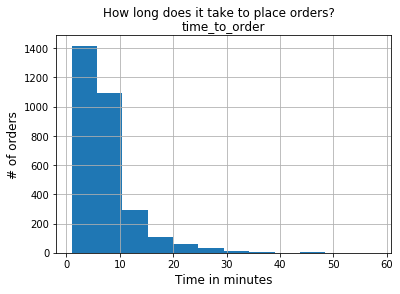

In [160]:
# df.iloc[:, 9] = df.iloc[:, 9].apply(pd.to_datetime, format="%H:%M:%S.%f")

#TDistribution of ime it takes to order by minute
df['time_to_order'] = df['how_long_it_took_to_order'].apply(lambda x: x.minute)
df.set_index('time_to_order', drop=False, inplace=True)

df.hist(column='time_to_order', bins=12)
plt.suptitle('How long does it take to place orders?')
plt.xlabel('Time in minutes', fontsize=12)
plt.ylabel('# of orders', fontsize=12)

#missing data is skewing the results. Almost 50% of time to order missing
print('{:2.2%}'.format(df['delivery_id'][df['time_to_order'] <= 10].count()/len(df['time_to_order'].dropna())), ' orders took 10 minutes or less')

In [ ]:
#which methods have the fastest deliveries

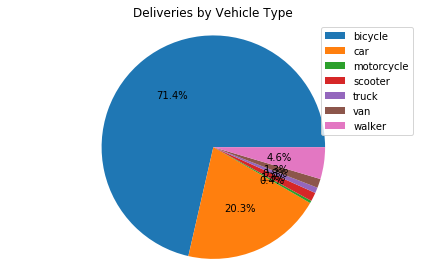

In [106]:
#deliveries by vehicle type
count_vehicle_type = df.delivery_id.groupby(df.vehicle_type).sum()
plt.pie(count_vehicle_type, autopct='%1.1f%%')
plt.title('Deliveries by Vehicle Type')
plt.axis('equal')
plt.legend(labels=count_vehicle_type.index, loc="best")
plt.tight_layout()
plt.show()

In [142]:
#average time to arrive at pick up by vehicle type
# add new columns to dataframe 
df['time_to_arrive_at_pickup'] = df['when_the_Jumpman_arrived_at_pickup'] -  df['when_the_delivery_started'] 
df['time_spent_waiting'] =  df['when_the_Jumpman_left_pickup']  - df['when_the_Jumpman_arrived_at_pickup'] 
df['time_to_arrive_at_dropoff'] =  df['when_the_Jumpman_arrived_at_dropoff']  - df['when_the_Jumpman_left_pickup'] 
df['total_delivery_time'] = df['when_the_Jumpman_arrived_at_dropoff'] - df['when_the_delivery_started']

df['vehicle_cat'] = df['vehicle_type'].map(lambda vehicle: vehicle if vehicle in ['car', 'bicycle'] else 'other')
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,delivery_hr,time_to_order,time_to_arrive_at_pickup,time_spent_waiting,time_to_arrive_at_dropoff,total_delivery_time,vehicle_cat
time_to_order,,,,,,,,,,,,,,,,,,,,,
19.0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,1900-01-01 00:19:58.582052,...,NaT,NaT,2014-10-26 14:52:06.313088,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000000019,NaT,NaT,NaT,01:00:06.414164,other
25.0,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,1900-01-01 00:25:09.107093,...,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1970-01-01 00:00:00.000000021,1970-01-01 00:00:00.000000025,00:27:03.466021,00:22:20.970322,00:10:59.857620,01:00:24.293963,bicycle
6.0,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,1900-01-01 00:06:44.541717,...,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,1970-01-01 00:00:00.000000021,1970-01-01 00:00:00.000000006,-1 days +23:57:26.139011,00:21:51.191405,00:05:30.650152,00:24:47.980568,bicycle
NaN,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaT,...,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,1970-01-01 00:00:00.000000010,NaT,00:10:06.227683,00:12:20.136239,00:16:00.194245,00:38:26.558167,bicycle
3.0,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),1900-01-01 00:03:45.035418,...,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000003,00:07:24.251718,00:10:36.698071,00:23:07.750301,00:41:08.700090,bicycle


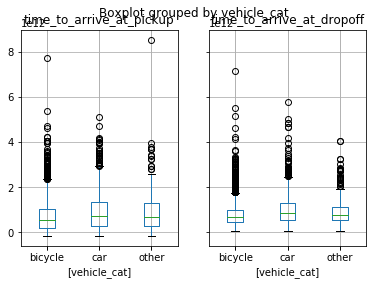

In [111]:
#box plot of time to arrive by vehicle type
boxplot = df.boxplot(column=['time_to_arrive_at_pickup', 'time_to_arrive_at_dropoff'], by=['vehicle_cat'])

In [143]:
#average by vehicle category
df['time_to_arrive_at_pickup'] = df['time_to_arrive_at_pickup'].dt.total_seconds()
average_time_to_pick = df.groupby('vehicle_cat').mean()
print(average_time_to_pick['time_to_arrive_at_pickup']/60)

vehicle_cat
bicycle    11.664398
car        15.455547
other      14.743632
Name: time_to_arrive_at_pickup, dtype: float64


In [144]:
df['time_to_arrive_at_dropoff'] = df['time_to_arrive_at_dropoff'].dt.total_seconds()
average_time_to_pick = df.groupby('vehicle_cat').mean()
print(average_time_to_pick['time_to_arrive_at_dropoff']/60)

vehicle_cat
bicycle    13.167639
car        16.974994
other      15.532482
Name: time_to_arrive_at_dropoff, dtype: float64


In [145]:
df['total_delivery_time'] = df['total_delivery_time'].dt.total_seconds()
average_time_to_pick = df.groupby('vehicle_cat').mean()
print(average_time_to_pick['total_delivery_time']/60)

vehicle_cat
bicycle    44.023133
car        52.040923
other      49.356794
Name: total_delivery_time, dtype: float64


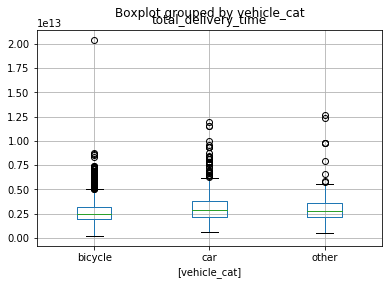

In [114]:
#overall delivery time by vehicle type
boxplot = df.boxplot(column=['total_delivery_time'], by=['vehicle_cat'])
#what's the y-axis showing me?

In [ ]:
boxplot = df.boxplot(by=['time_spent_waiting'])